## MALWARE CHECKPOINT

In [31]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

sns.set()
plt.style.use('ggplot')
#plt.style.use('dark_background')

%matplotlib inline

In [32]:
Microsoft_df = pd.read_csv(r"C:\Users\Uthy\Downloads\Microsoft_malware_dataset_min.csv")
Microsoft_df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [33]:
df = Microsoft_df.copy()

#### Display General Information 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [35]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [66]:
df.dtypes 

HasDetections                   int64
Wdft_IsGamer                  float64
Census_IsVirtualDevice        float64
Census_OSEdition               object
Census_HasOpticalDiskDrive      int64
Firewall                      float64
SMode                         float64
IsProtected                   float64
OsPlatformSubRelease           object
CountryIdentifier               int64
dtype: object

In [37]:
#To check for duplicates 
df.duplicated().value_counts()

True     79581
False    20419
Name: count, dtype: int64

In [38]:
#Dropping the duplicates 

df.drop_duplicates(inplace= True )

In [39]:
#Checking for null values in the data frame 
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  1405
Census_IsVirtualDevice         169
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                       471
SMode                         3670
IsProtected                    343
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

#### Dealing with NaNs/ Nulls values 

In [40]:
df["Wdft_IsGamer"].isnull().value_counts()

Wdft_IsGamer
False    19014
True      1405
Name: count, dtype: int64

In [43]:
df["Wdft_IsGamer"].mode()[0]

0.0

In [44]:
#Filling the null values in this column

df["Wdft_IsGamer"].fillna(df["Wdft_IsGamer"].mode()[0], inplace= True)

In [45]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                     0
Census_IsVirtualDevice         169
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                       471
SMode                         3670
IsProtected                    343
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [47]:
df["Census_IsVirtualDevice"].mode()[0]

0.0

In [48]:
df["Census_IsVirtualDevice"].fillna(df["Census_IsVirtualDevice"].mode()[0], inplace= True)

In [50]:
df["Firewall"].mode()[0]

1.0

In [52]:
df["Firewall"].fillna(df["Firewall"].mode()[0], inplace= True)

In [55]:
df["SMode"].mode()[0]

0.0

In [56]:
df["SMode"].fillna(df["Firewall"].mode()[0], inplace= True )

In [57]:
df["IsProtected"].mode()[0]

1.0

In [58]:
df["IsProtected"].fillna(df["Firewall"].mode()[0], inplace= True )

In [67]:
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

#### Ydata Profiling 

In [62]:
from ydata_profiling import ProfileReport

In [64]:
profile = ProfileReport(df, title = "Date Profile Report")

In [65]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Encoding the categorical features 


In [68]:
#Import the necessary library
from sklearn.preprocessing import LabelEncoder

encoder = {}

for columns in df.select_dtypes("object").columns:
    #Creating the key and assinging to an encoder 
    encoder[f"{columns.lower()}"] = LabelEncoder()
    df[columns] =  encoder[f"{columns.lower()}"].fit_transform(df[columns])
    


#### Checking for outliers 

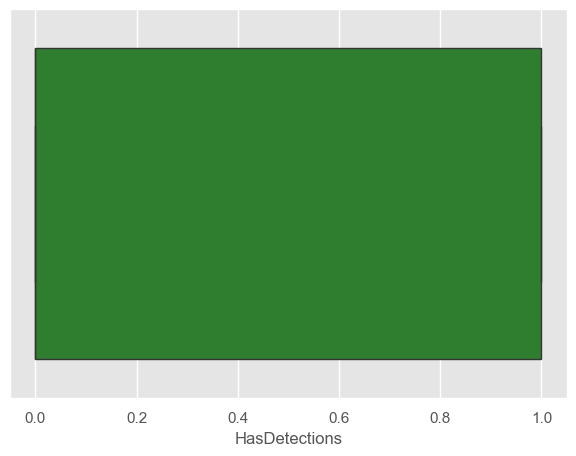

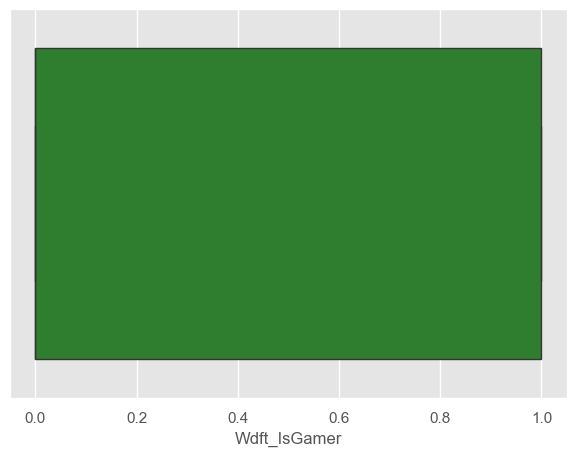

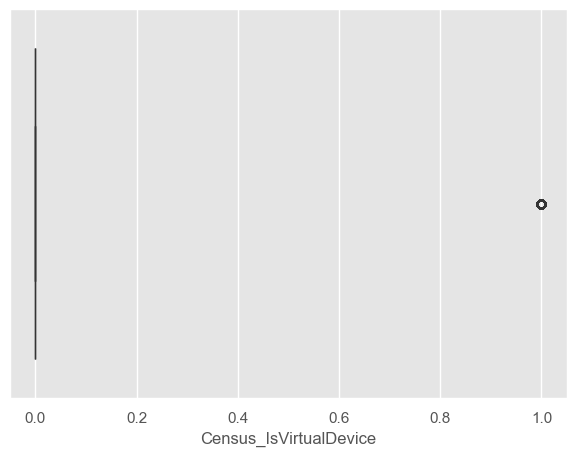

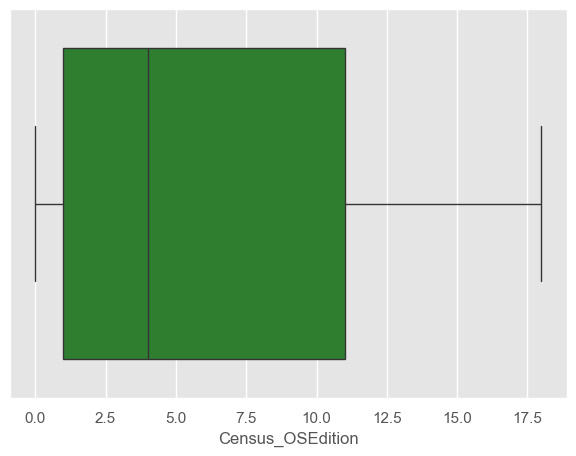

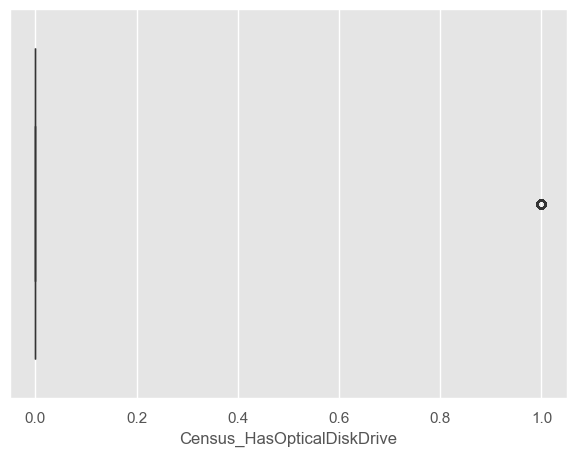

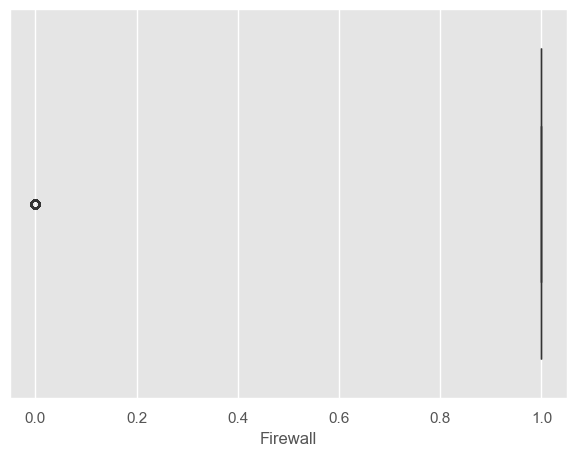

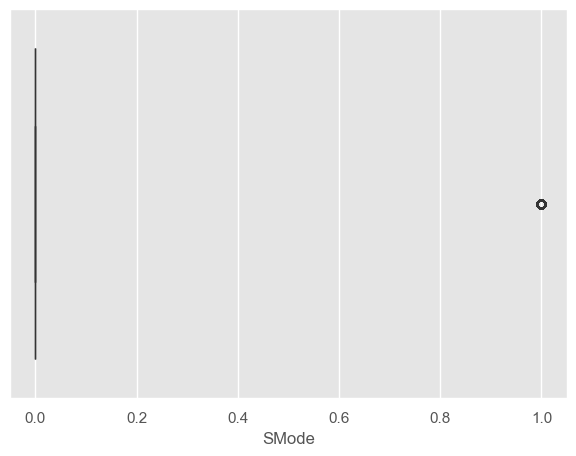

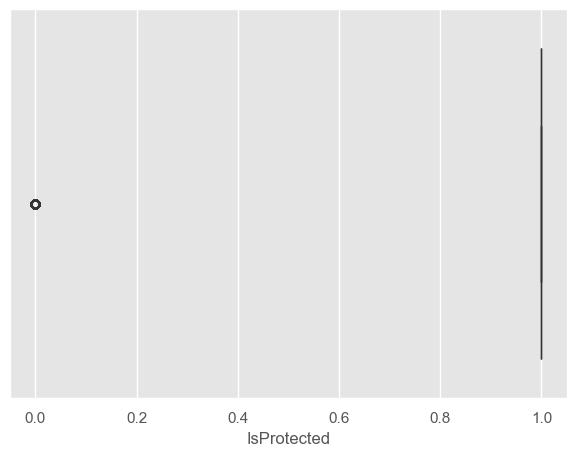

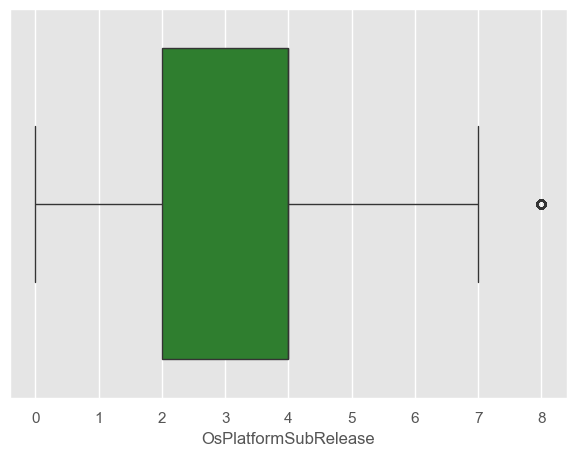

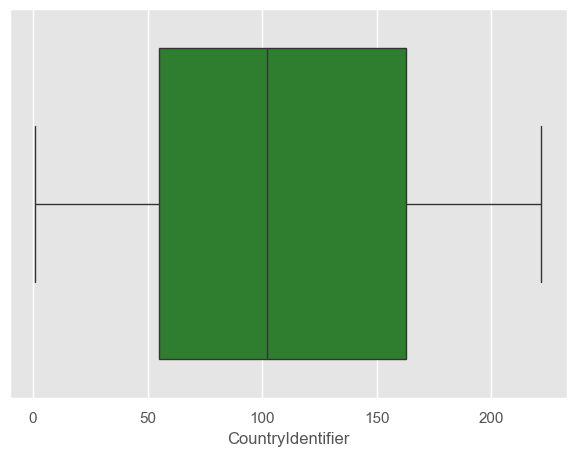

In [73]:
for cols in df.select_dtypes(include="number").columns:
    sns.boxplot(df, x=cols, color = "ForestGreen")
    plt.show()

#### Model phase 

In [76]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop("HasDetections", axis = 1 )

y = df["HasDetections"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , stratify= y , random_state= 102  )

### Decision Tree Model

In [108]:
#Importing Decision Tree Regressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
#Instantiating the model
dec_tree = DecisionTreeClassifier( random_state= 42)
#Training the model to learn about the Independent variables and Dependent variable
dec_tree.fit(X_train, y_train)

#Testing the model on what it has leant from the data.
dec_test_pred = dec_tree.predict(X_test)

#Testing the model to know how well it has learnt the data 
dec_train_pred = dec_tree.predict(X_train)

#To test the model for over fitting.  
print (" Classification Report :")
print ( classification_report(y_test, dec_test_pred ))

 Classification Report :
              precision    recall  f1-score   support

           0       0.36      0.41      0.39      2171
           1       0.22      0.18      0.20      1913

    accuracy                           0.31      4084
   macro avg       0.29      0.30      0.29      4084
weighted avg       0.29      0.31      0.30      4084



####  ROC Curve 

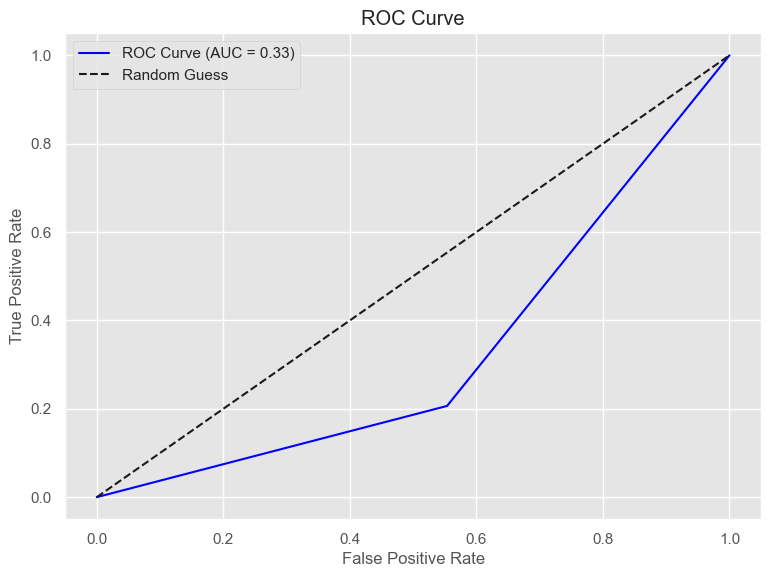

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr, tpr, thresholds = roc_curve(y_test,dec_test_pred)
auc_score = roc_auc_score(y_test,dec_test_pred)



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

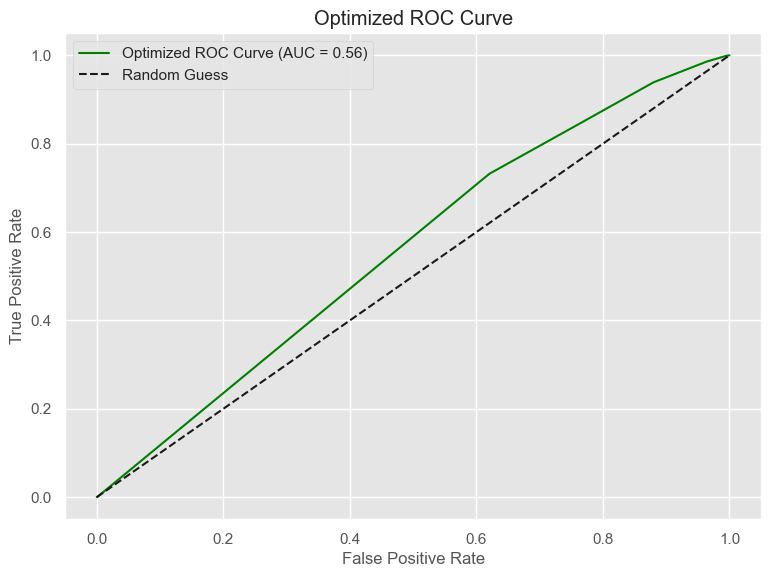

In [98]:
best_y_proba = best_model.predict_proba(X_test)[:, 1]
best_fpr, best_tpr, _ = roc_curve(y_test, best_y_proba)
best_auc = roc_auc_score(y_test, best_y_proba)

plt.figure(figsize=(8, 6))
plt.plot(best_fpr, best_tpr, label=f"Optimized ROC Curve (AUC = {best_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Optimized ROC Curve")
plt.legend()
plt.show()


----

### Unsupervised Learning 

In [111]:
#To do Unsupervised learning you need to drop the Dependent Variable from the dataframe used earlier.

X_cluster = df.drop("HasDetections", axis = 1 )

In [112]:
#Importing the Necessary Library to perform K means 

from sklearn.cluster import KMeans

In [116]:
df.corr()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
HasDetections,1.000000,0.010339,-0.083123,0.013685,0.017517,-0.010656,-0.043645,0.058519,0.015245,0.002629
Wdft_IsGamer,0.010339,1.000000,-0.084489,-0.024802,0.051389,0.015348,-0.055012,0.062878,-0.068807,0.019688
Census_IsVirtualDevice,-0.083123,-0.084489,1.000000,0.118013,-0.067947,-0.029038,-0.048136,0.058075,-0.022068,-0.013209
Census_OSEdition,0.013685,-0.024802,0.118013,1.000000,0.004441,-0.078114,-0.053421,0.046552,-0.011590,0.002343
Census_HasOpticalDiskDrive,0.017517,0.051389,-0.067947,0.004441,1.000000,0.056003,-0.090665,0.072187,0.000529,-0.001918
Firewall,-0.010656,0.015348,-0.029038,-0.078114,0.056003,1.000000,0.082310,-0.064045,0.000767,-0.011331
SMode,-0.043645,-0.055012,-0.048136,-0.053421,-0.090665,0.082310,1.000000,-0.129090,-0.066428,-0.014041
IsProtected,0.058519,0.062878,0.058075,0.046552,0.072187,-0.064045,-0.129090,1.000000,0.008101,-0.009035
OsPlatformSubRelease,0.015245,-0.068807,-0.022068,-0.011590,0.000529,0.000767,-0.066428,0.008101,1.000000,-0.004496
CountryIdentifier,0.002629,0.019688,-0.013209,0.002343,-0.001918,-0.011331,-0.014041,-0.009035,-0.004496,1.000000


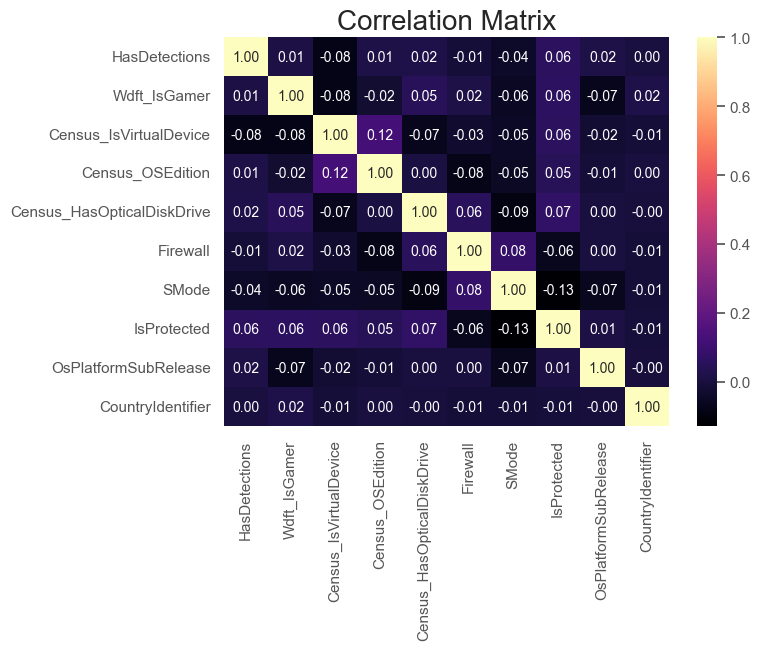

In [119]:
#Creating a heatmap
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="magma")
plt.title("Correlation Matrix",fontsize=20)
plt.show()

In [121]:
k_model  = KMeans(n_clusters= 3, random_state= 42)
k_model.fit(X_cluster)

labels = k_model.labels_



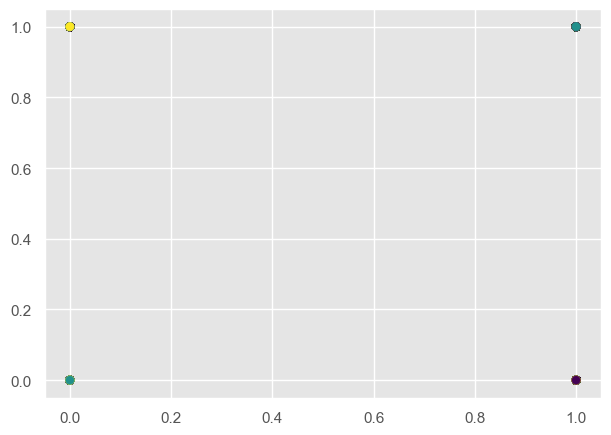

In [122]:
#Creating a scatter plot between a customer purchases and credit limit from what the model has learnt KModel(Partioning)
plt.scatter(x = df["Firewall"], y = df["IsProtected"], c = k_model.labels_, cmap="viridis")
plt.show()

###  K_Elbow 

In [131]:
from yellowbrick.cluster import KElbowVisualizer

optimum clusters 5


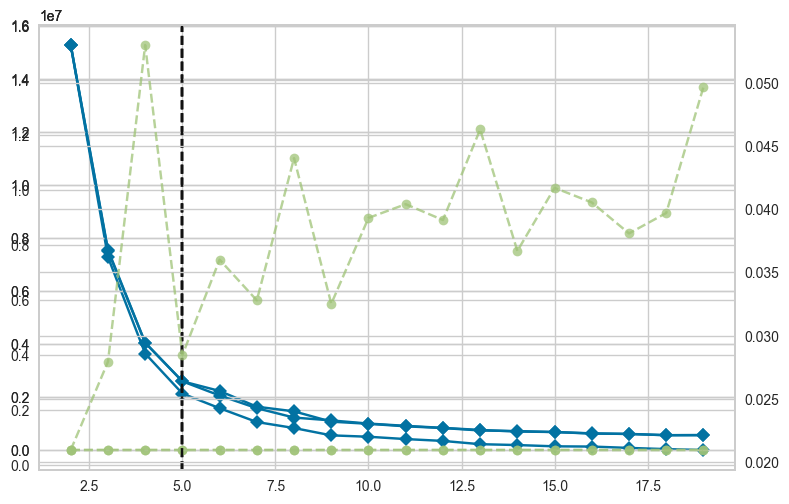

In [133]:
Kmeans_model = KMeans()
vis = KElbowVisualizer(Kmeans_model,k = (2, 20))
vis.fit(X_train)
n_clusters = vis.elbow_value_
print("optimum clusters",n_clusters)
plt.show()